In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import sklearn

# **Importing** Data

In [3]:
heart_data = pd.read_csv('heart_failure_clinical_records_dataset.csv')

In [ ]:
Heart_data= pd.DataFrame(heart_data)

In [ ]:
Heart_data

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,61,1,38,1,155000.00,1.1,143,1,1,270,0
295,55.0,0,1820,0,38,0,270000.00,1.2,139,0,0,271,0
296,45.0,0,2060,1,60,0,742000.00,0.8,138,0,0,278,0
297,45.0,0,2413,0,38,0,140000.00,1.4,140,1,1,280,0


In [4]:
#Time is not needed for analysing the data 
heart_data.drop('time',axis=1,inplace=True)

In [5]:
#time has been removed from heart data
heart_data

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,61,1,38,1,155000.00,1.1,143,1,1,0
295,55.0,0,1820,0,38,0,270000.00,1.2,139,0,0,0
296,45.0,0,2060,1,60,0,742000.00,0.8,138,0,0,0
297,45.0,0,2413,0,38,0,140000.00,1.4,140,1,1,0


In [ ]:
!pip install scipy

# Calling packages and Splitting Data

In [99]:
#removing warnings
import warnings
warnings.filterwarnings("ignore");

#importing packages
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import SequentialFeatureSelector

acc = {}
#train test split
feature = heart_data.iloc[:,:11]
label = heart_data.iloc[:,11:]
X_train, X_test, y_train, y_test = train_test_split(feature, label, test_size=0.2, random_state=42)


In [7]:
print(X_train)
print(y_train)

        age  anaemia  creatinine_phosphokinase  diabetes  ejection_fraction  \
6    75.000        1                       246         0                 15   
183  75.000        0                        99         0                 38   
185  60.667        1                       104         1                 30   
146  52.000        0                       132         0                 30   
30   94.000        0                       582         1                 38   
..      ...      ...                       ...       ...                ...   
188  60.667        1                       151         1                 40   
71   58.000        0                       582         1                 35   
106  55.000        0                       748         0                 45   
270  44.000        0                       582         1                 30   
102  80.000        0                       898         0                 25   

     high_blood_pressure  platelets  serum_creatini

Training Data and Test Data

In [ ]:
print(X_test)
print(y_test)

      age  anaemia  creatinine_phosphokinase  ...  serum_sodium  sex  smoking
281  70.0        0                       582  ...           136    1        1
265  50.0        1                       298  ...           140    1        1
164  45.0        0                      2442  ...           139    1        0
9    80.0        1                       123  ...           133    1        1
77   42.0        0                       102  ...           140    1        0
..    ...      ...                       ...  ...           ...  ...      ...
16   87.0        1                       149  ...           140    1        0
119  86.0        0                       582  ...           134    0        0
268  45.0        0                       582  ...           140    0        0
269  40.0        0                       582  ...           132    1        0
67   72.0        1                       110  ...           140    1        1

[99 rows x 11 columns]
     DEATH_EVENT
281            0
265   

# **Random Forest**

In [50]:
#RandomForest
clf1 = RandomForestClassifier(n_estimators=200, max_depth=None, random_state=42);
clf1.fit(X_train, y_train);
y_true = y_test;
y_pred = clf1.predict(X_test);
acc["RF"] = accuracy_score(y_true, y_pred)*100;
print("rf accuracy: ",acc["RF"]);

rf accuracy:  71.66666666666667


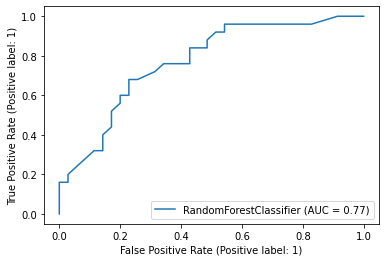

In [10]:
plot_roc_curve(clf1, X_test, y_test)
plt.show()

In [13]:
roc_auc_score(y_true, clf1.predict_proba(X_test)[:, 1])

0.7702857142857144

In [18]:
tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
specificity = tn / (tn+fp)
sensitivity = tp / (tp+fn)
print("sensitivity : ",sensitivity)
print("specificity : ",specificity) 


sensitivity :  0.48
specificity :  0.8285714285714286


In [51]:
param_grid = {
    'random_state': [42],
    'bootstrap': [True],
    'max_depth': [None, 10, 20],
    'max_features': ['auto', 2, 3],
    'min_samples_leaf': [1,2,3],
    'min_samples_split': [1,2,4],
    'n_estimators': [80, 100, 150, 200]
}
grid_search = GridSearchCV(estimator = clf1, param_grid = param_grid, cv=[(slice(None), slice(None))], n_jobs = -1, verbose = 2)
grid_search.fit(X_train, y_train)
best_grid = grid_search.best_estimator_

Fitting 1 folds for each of 324 candidates, totalling 324 fits


In [53]:
y_pred = best_grid.predict(X_test);
grid_acc = accuracy_score(y_true, y_pred)*100;
print("accuracy after grid serach : ",grid_acc)
print("parameter befor tuning : ", clf1.get_params());
print("best parameter after grid search: ", grid_search.best_params_)


accuracy after grid serach :  73.33333333333333
parameter befor tuning :  {'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 'auto', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 200, 'n_jobs': None, 'oob_score': False, 'random_state': 42, 'verbose': 0, 'warm_start': False}
best parameter after grid search:  {'bootstrap': True, 'max_depth': None, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 80, 'random_state': 42}


In [66]:
sfs = SequentialFeatureSelector(clf1, n_features_to_select=1)
sfs.fit(X_train, y_train)
F_train = sfs.transform(X_train)
F_test = sfs.transform(X_test)

In [67]:
clf1.fit(F_train, y_train);
y_pred = clf1.predict(F_test);
fs_acc = accuracy_score(y_true, y_pred)*100;
print("rf accuracy: ",fs_acc);

rf accuracy:  70.0


# **KNN**

In [93]:
#KNN
clf1 = KNeighborsClassifier(n_neighbors=3, weights='uniform', algorithm='brute');
clf1.fit(X_train, y_train);
y_true = y_test;
y_pred = clf1.predict(X_test);
acc["KNN"] = accuracy_score(y_true, y_pred)*100;
print("rf accuracy: ",acc["KNN"]);

rf accuracy:  53.333333333333336


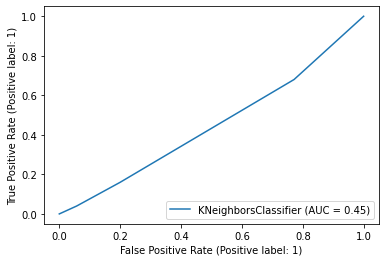

In [71]:
plot_roc_curve(clf1, X_test, y_test)
plt.show()

In [72]:
roc_auc_score(y_true, clf1.predict_proba(X_test)[:, 1])

0.4474285714285714

In [73]:
tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
specificity = tn / (tn+fp)
sensitivity = tp / (tp+fn)
print("sensitivity : ",sensitivity)
print("specificity : ",specificity) 


sensitivity :  0.16
specificity :  0.8


In [91]:
param_grid = {
    'n_neighbors': [3,5,10,20],
    'weights': ['uniform','distance'],
    'algorithm': ['auto','ball_tree','kd_tree','brute'],
    'leaf_size': [10,20,30]
}
grid_search = GridSearchCV(estimator = clf1, param_grid = param_grid, n_jobs = -1, verbose = 2, cv=[(slice(None), slice(None))])
grid_search.fit(X_train, y_train)
best_grid = grid_search.best_estimator_

Fitting 1 folds for each of 96 candidates, totalling 96 fits


In [92]:
y_pred = best_grid.predict(X_test);
grid_acc = accuracy_score(y_true, y_pred)*100;
print("accuracy after grid serach : ",grid_acc)
print("parameter before tuning : ", clf1.get_params());
print("best parameter after grid search: ", grid_search.best_params_)


accuracy after grid serach :  55.00000000000001
parameter before tuning :  {'algorithm': 'brute', 'leaf_size': 30, 'metric': 'minkowski', 'metric_params': None, 'n_jobs': None, 'n_neighbors': 100, 'p': 2, 'weights': 'uniform'}
best parameter after grid search:  {'algorithm': 'auto', 'leaf_size': 10, 'n_neighbors': 3, 'weights': 'distance'}


In [94]:
sfs = SequentialFeatureSelector(clf1, n_features_to_select=2)
sfs.fit(X_train, y_train)
F_train = sfs.transform(X_train)
F_test = sfs.transform(X_test)

In [96]:
clf1.fit(F_train, y_train);
y_pred = clf1.predict(F_test);
fs_acc = accuracy_score(y_true, y_pred)*100;
print("knn accuracy: ",fs_acc);

knn accuracy:  63.33333333333333


# **DecisionTree**

In [100]:
#DecisionTree
clf1 = DecisionTreeClassifier(max_depth=10, splitter='random', criterion='entropy', random_state=42);
clf1.fit(X_train, y_train);
y_true = y_test;
y_pred = clf1.predict(X_test);
acc["DT"] = accuracy_score(y_true, y_pred)*100;
print("DT accuracy: ",acc["DT"]);

DT accuracy:  66.66666666666666


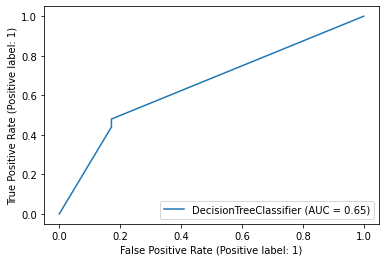

In [101]:
plot_roc_curve(clf1, X_test, y_test)
plt.show()

In [102]:
roc_auc_score(y_true, clf1.predict_proba(X_test)[:, 1])

0.6508571428571428

In [103]:
tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
specificity = tn / (tn+fp)
sensitivity = tp / (tp+fn)
print("sensitivity : ",sensitivity)
print("specificity : ",specificity) 


sensitivity :  0.44
specificity :  0.8285714285714286


In [105]:
param_grid = {
    'max_depth':[None,10,20,30],
    'splitter':['random','best'],
    'criterion':['entropy','gini'],
    'random_state':[42]
}
grid_search = GridSearchCV(estimator = clf1, param_grid = param_grid, cv=[(slice(None), slice(None))], n_jobs = -1, verbose = 2)
grid_search.fit(X_train, y_train)
best_grid = grid_search.best_estimator_

Fitting 1 folds for each of 16 candidates, totalling 16 fits


In [106]:
y_pred = best_grid.predict(X_test);
grid_acc = accuracy_score(y_true, y_pred)*100;
print("accuracy after grid serach : ",grid_acc)
print("parameter befor tuning : ", clf1.get_params());
print("best parameter after grid search: ", grid_search.best_params_)


accuracy after grid serach :  68.33333333333333
parameter befor tuning :  {'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'entropy', 'max_depth': 10, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'random_state': 42, 'splitter': 'random'}
best parameter after grid search:  {'criterion': 'entropy', 'max_depth': None, 'random_state': 42, 'splitter': 'random'}


In [111]:
sfs = SequentialFeatureSelector(clf1, n_features_to_select=3)
sfs.fit(X_train, y_train)
F_train = sfs.transform(X_train)
F_test = sfs.transform(X_test)

In [112]:
clf1.fit(F_train, y_train);
y_pred = clf1.predict(F_test);
fs_acc = accuracy_score(y_true, y_pred)*100;
print("rf accuracy: ",fs_acc);

rf accuracy:  73.33333333333333
